## The Process of EDA:
1. Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable). You can do this in the form of questions in a natural language (as opposed to "statistical" language).

2. Visualize: use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

3. Test your hypotheses when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)



## Exercises
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

In [27]:
import acquire
import prepare
import split

df = acquire.get_iris_db()
df = prepare.prep_iris(df)
df.head(10)

,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,setosa,1,5.1,3.5,1.4,0.2
1,setosa,2,4.9,3.0,1.4,0.2
2,setosa,3,4.7,3.2,1.3,0.2
3,setosa,4,4.6,3.1,1.5,0.2
4,setosa,5,5.0,3.6,1.4,0.2
5,setosa,6,5.4,3.9,1.7,0.4
6,setosa,7,4.6,3.4,1.4,0.3
7,setosa,8,5.0,3.4,1.5,0.2
8,setosa,9,4.4,2.9,1.4,0.2
9,setosa,10,4.9,3.1,1.5,0.1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         150 non-null    object 
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## 1. Univariate Stats
### Find the outliers
For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [29]:
df = df.drop(['measurement_id'], axis=1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5


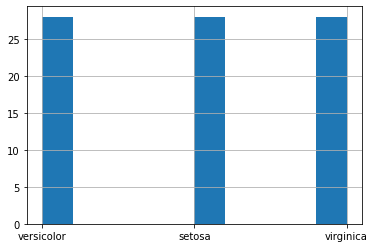

In [30]:
# For Species, the categorical variable, we want to view the distribution
# for it
train, validate, test = split.train_validate_test_split(df, 'species')
train.species.hist()
plt.show

train.describe().T

In [31]:
train.head(5)

,species,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2
133,virginica,6.3,2.8,5.1,1.5
95,versicolor,5.7,3.0,4.2,1.2
18,setosa,5.7,3.8,1.7,0.3


### Hypotheses:

1. 0: Null: there is no relationship between species and petal length/width/sepal length/width
    
    1: Alternate: species is correlated to petal length/width/sepal length/width
    

In [32]:
# We see there are an equal distribution of species.

In [33]:
#QUANT COLS
quant_col =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

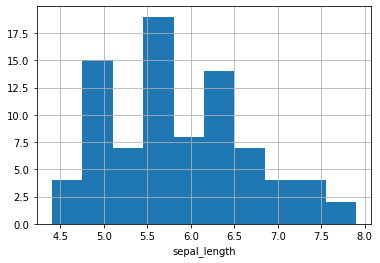

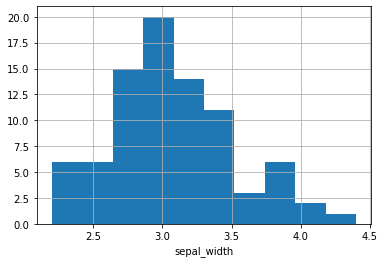

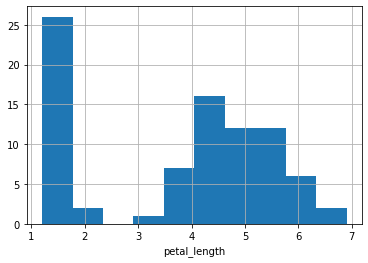

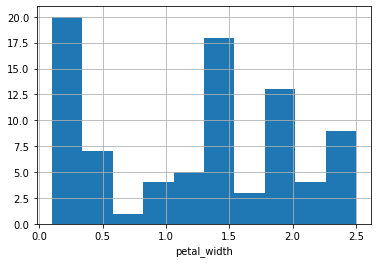

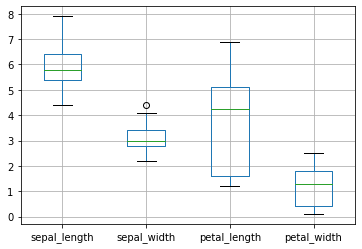

In [34]:
for col in quant_col:
    train[col].hist()
    plt.xlabel(col)
    plt.show()
    
train.boxplot(column = quant_col)
plt.show()

In [35]:
train[quant_col].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5


2. Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.



In [36]:
# We are going to examine the intersection of species type, against 
# petal width and petal length, visually, for correlation.

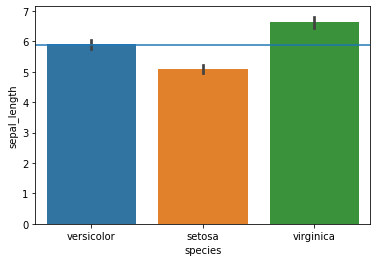

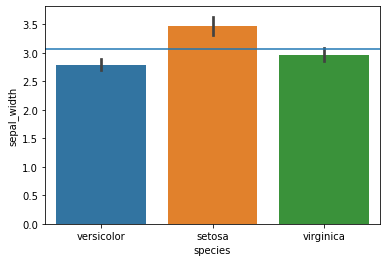

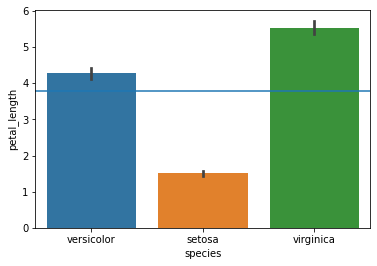

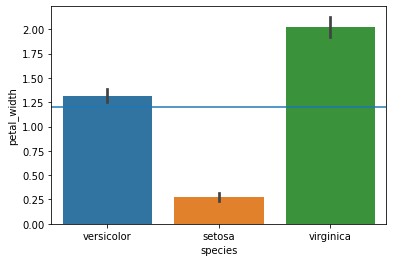

In [37]:
for col in quant_col:
    sns.barplot(x="species", y=train[col], data=train)
    avg = train[col].mean()
    plt.axhline(avg, label=f'Avg {train[col]}')
    plt.show()

In [38]:
# For each measurement type, compute the descriptive statistics
# for each species.

df.groupby(['species']).agg(['count','min', 'max', 'mean', 'std'])

sepal_length                            sepal_width            \
                  count  min  max   mean       std       count  min  max   
species                                                                    
setosa               50  4.3  5.8  5.006  0.352490          50  2.3  4.4   
versicolor           50  4.9  7.0  5.936  0.516171          50  2.0  3.4   
virginica            50  4.9  7.9  6.588  0.635880          50  2.2  3.8   

                            petal_length                             \
             mean       std        count  min  max   mean       std   
species                                                               
setosa      3.428  0.379064           50  1.0  1.9  1.462  0.173664   
versicolor  2.770  0.313798           50  3.0  5.1  4.260  0.469911   
virginica   2.974  0.322497           50  4.5  6.9  5.552  0.551895   

           petal_width                             
                 count  min  max   mean       std  
species                                            
setosa              50  0.1  0.6  0.246  0.105386  
versicolor          50  1.0  1.8  1.326  0.197753  
virginica           50  1.4  2.5  2.026  0.274650

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

In [45]:
#ALT: random obs from virginica is greater than a random obs 
# from versicolor
#Null: random obs from virginica is less than or equal to a random obs 
# from versicolor


virginica = train[train.species =='virginica']
setosa = train[train.species =='setosa']
versicolor = train[train.species =='versicolor']

for col in quant_col:
    t, p = stats.mannwhitneyu(virginica[col], versicolor[col])

    print(f'Virginica/Versicolor {col}:')
    print(f't: {t}, p: {p}\n')



Virginica/Versicolor sepal_length:
t: 676.5, p: 3.082029196534108e-06

Virginica/Versicolor sepal_width:
t: 510.0, p: 0.05257259139845694

Virginica/Versicolor petal_length:
t: 776.5, p: 2.9479835715150625e-10

Virginica/Versicolor petal_width:
t: 767.0, p: 6.47119166980993e-10



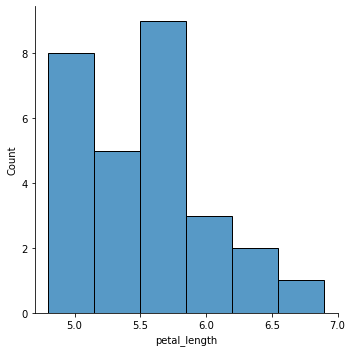

In [46]:
sns.displot(data=virginica, x=virginica.petal_length)

<AxesSubplot:>

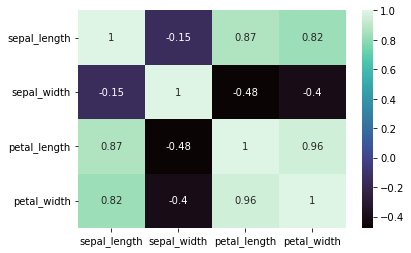

In [51]:
train.corr()
sns.heatmap(train.corr(), cmap = 'mako', annot = True)

## Takeaways:

- the Mann_Whiteney test revealed the following:
    -mean sepal length, petal length, and petal width were higher for the Virginica species, with a high degree of certainty (p < 0.05)
    -mean sepal_width is not reliably greater for Virginica (p > 0.05)


Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



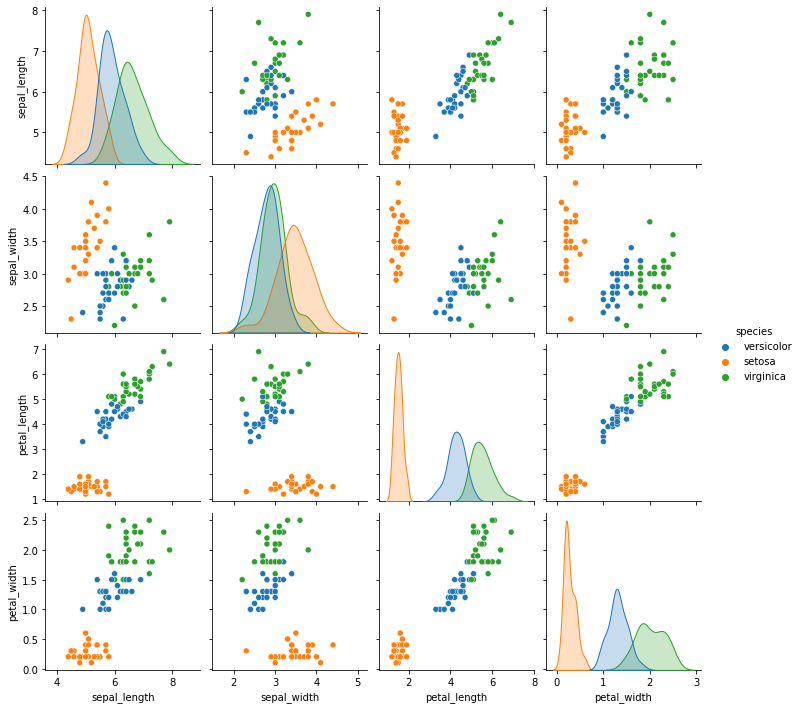

In [15]:
sns.pairplot(train, hue='species')

## Pairplot Takeaways:

- petal length, petal width, (and sepal length to a lesser extent), are good indicators of species
- petal_width(x-axis) to petal_length(y-axis) shows a clear demarcation between species. That ratio could be valuable from a predictive standpoint

## Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

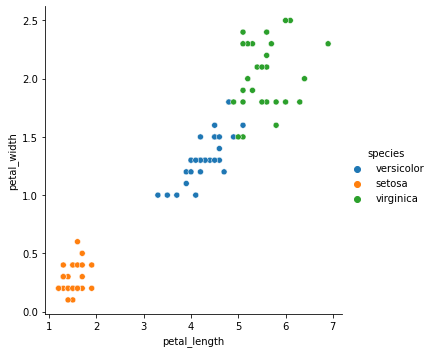

In [16]:
sns.relplot(x=train.petal_length, 
            y=train.petal_width, 
            hue=train.species)

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

## Exercises Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [54]:
# put the data through our acquire, prep and split functions
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
train, test, validate = split.train_validate_test_split(df, 'survived')

In [55]:
# determine the size of the resulting dataframe
train.shape

(498, 10)

In [56]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
583,0,1,male,36.0,0,0,40.1250,A,Cherbourg,1
165,1,3,male,9.0,0,2,20.5250,NaN,Southampton,0
50,0,3,male,7.0,4,1,39.6875,NaN,Southampton,0
259,1,2,female,50.0,0,1,26.0000,NaN,Southampton,0
306,1,1,female,NaN,0,0,110.8833,NaN,Cherbourg,1


In [57]:
#determine the amount of null data
train.isna().sum()

survived         0
pclass           0
sex              0
age             97
sibsp            0
parch            0
fare             0
deck           392
embark_town      1
alone            0
dtype: int64

In [58]:
# ...and then as a percentage
train.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.194779
sibsp          0.000000
parch          0.000000
fare           0.000000
deck           0.787149
embark_town    0.002008
alone          0.000000
dtype: float64

In [ ]:
## Takeaway: deck is 79% null, so I'm going to drop this column.
train = train.drop(columns=['deck'])

In [59]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
583,0,1,male,36.0,0,0,40.1250,A,Cherbourg,1
165,1,3,male,9.0,0,2,20.5250,NaN,Southampton,0
50,0,3,male,7.0,4,1,39.6875,NaN,Southampton,0
259,1,2,female,50.0,0,1,26.0000,NaN,Southampton,0
306,1,1,female,NaN,0,0,110.8833,NaN,Cherbourg,1


In [23]:
# Now formulate questions to explore:
# Are the following related to our target variable, 'survived':
# alone, sex, pclass
#...now make some charts to visualize the interaction 
# with our target variable

<AxesSubplot:>

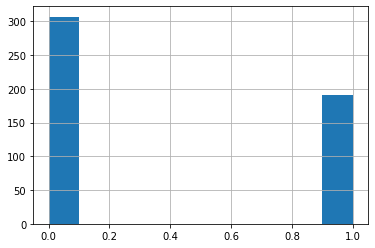

In [60]:
train.survived.hist()

## Exercises Part III
Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
df = acquire.get_telco_data()
df = prepare.prep_telco(df)
df.head()

In [ ]:
# viz of overall churn rate